# Self-Drive Cars' Sentiment Analysis

- Feature extraction 
- Text cleaning
- Comparison of undity and cleaned text data



# 1)-Importing key modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import datetime as dt
import numpy as np
import requests
import pickle

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hassansherwani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import spacy 

nlp = spacy.load("en_core_web_sm") # preload model

In [4]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2)-Loading data

In [5]:
filename='train.csv'

In [6]:
train=pd.read_csv(filename)
train.shape

(6943, 1)

In [7]:
train.head(2)

,TEXT
0,Softball goes 2-0 against Liberty Center! shou...
1,Ford F350 XCAB 7.3 DIESEL FLATBED 5TH WHEEL 4X...


# 3)-Feature Extraction

- Number of words
- Number of characters
- Average word length
- Number of stopwords
- Number of special characters
- Number of numerics
- Number of uppercase words

### 3.1)-Number of words

One of the most basic features we can extract is the number of words in each tweet. The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.

To do this, we simply use the split function

In [8]:
train['word_count'] = train['TEXT'].apply(lambda x: len(str(x).split(" ")))
train[['TEXT','word_count']].head()

,TEXT,word_count
0,Softball goes 2-0 against Liberty Center! shou...,23
1,Ford F350 XCAB 7.3 DIESEL FLATBED 5TH WHEEL 4X...,18
2,You will hear me cheering this #Porsche from M...,17
3,Crowning your new Miss UST tomorrow! 5pm | M...,14
4,NEW: Knight announces major $5.25 million init...,25


### 3.2)-Number of characters
This feature is also based on the previous feature intuition. Here, we calculate the number of characters in each tweet(space, special character included). This is done by calculating the length of the tweet.

In [9]:
train['char_count'] = train['TEXT'].str.len() ## this also includes spaces
train[['TEXT','char_count']].head()

,TEXT,char_count
0,Softball goes 2-0 against Liberty Center! shou...,134
1,Ford F350 XCAB 7.3 DIESEL FLATBED 5TH WHEEL 4X...,135
2,You will hear me cheering this #Porsche from M...,151
3,Crowning your new Miss UST tomorrow! 5pm | M...,90
4,NEW: Knight announces major $5.25 million init...,196


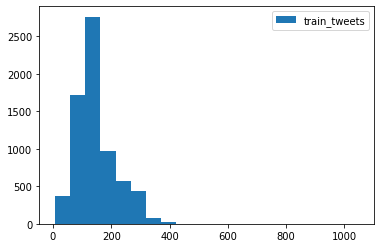

In [10]:
length_train = train['TEXT'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.legend() 
plt.show()

### 3.3)- Average Word Length
Take the sum of the length of all the words and divide it by the total length of the tweet

In [11]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['TEXT'].apply(lambda x: avg_word(x))
train[['TEXT','avg_word']].head()

,TEXT,avg_word
0,Softball goes 2-0 against Liberty Center! shou...,4.869565
1,Ford F350 XCAB 7.3 DIESEL FLATBED 5TH WHEEL 4X...,6.882353
2,You will hear me cheering this #Porsche from M...,7.941176
3,Crowning your new Miss UST tomorrow! 5pm | M...,7.000000
4,NEW: Knight announces major $5.25 million init...,6.880000


### 3.4)-Number of stopwords
- We shall use nltk stopword library. One may customize stopwords
- Some examples are "the, is, at, which, and, on"

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['stopwords'] = train['TEXT'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['TEXT','stopwords']].head()

,TEXT,stopwords
0,Softball goes 2-0 against Liberty Center! shou...,10
1,Ford F350 XCAB 7.3 DIESEL FLATBED 5TH WHEEL 4X...,0
2,You will hear me cheering this #Porsche from M...,4
3,Crowning your new Miss UST tomorrow! 5pm | M...,1
4,NEW: Knight announces major $5.25 million init...,5


### 3.5)-Number of special characters
- One easy example is number of hashtags
- Use of the ‘starts with’ function because hashtags (or mentions) always appear at the beginning of a word.

In [13]:
train['TEXT'][2]

'You will hear me cheering this #Porsche from Mars I would say. #b12hr @VanthoorLaurens @kevinestre @earlbamber @WalkinshawGT3pic.twitter.com/yM28E3Vqdj'

In [14]:
train['hastags'] = train['TEXT'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['TEXT','hastags']].head()

,TEXT,hastags
0,Softball goes 2-0 against Liberty Center! shou...,0
1,Ford F350 XCAB 7.3 DIESEL FLATBED 5TH WHEEL 4X...,2
2,You will hear me cheering this #Porsche from M...,2
3,Crowning your new Miss UST tomorrow! 5pm | M...,1
4,NEW: Knight announces major $5.25 million init...,1


In [15]:
train[['TEXT','hastags']].tail()

,TEXT,hastags
6938,Global Alternative Fuel-powered Military Fleet...,0
6939,MER and Tesla Motor may explore a possible par...,0
6940,Check out Custom #Boots Mercedes #Texas Two To...,4
6941,Self-driving cars will be used by 1. Seniors 2...,0
6942,Volvo’s deploying fully autonomous self-drivin...,3


In [16]:
train['@'] = train['TEXT'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
train[['TEXT','@']].head()

,TEXT,@
0,Softball goes 2-0 against Liberty Center! shou...,1
1,Ford F350 XCAB 7.3 DIESEL FLATBED 5TH WHEEL 4X...,0
2,You will hear me cheering this #Porsche from M...,4
3,Crowning your new Miss UST tomorrow! 5pm | M...,0
4,NEW: Knight announces major $5.25 million init...,0


### 3.6)-Number of numerics/digits

In [17]:
train['numerics'] = train['TEXT'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['TEXT','numerics']].head()

,TEXT,numerics
0,Softball goes 2-0 against Liberty Center! shou...,0
1,Ford F350 XCAB 7.3 DIESEL FLATBED 5TH WHEEL 4X...,0
2,You will hear me cheering this #Porsche from M...,0
3,Crowning your new Miss UST tomorrow! 5pm | M...,0
4,NEW: Knight announces major $5.25 million init...,0


In [18]:
# example
s = "28212"
print(s.isdigit())

True


### 3.7)-Number of Uppercase words

In [19]:
train['upper'] = train['TEXT'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['TEXT','upper']].head()

,TEXT,upper
0,Softball goes 2-0 against Liberty Center! shou...,1
1,Ford F350 XCAB 7.3 DIESEL FLATBED 5TH WHEEL 4X...,10
2,You will hear me cheering this #Porsche from M...,1
3,Crowning your new Miss UST tomorrow! 5pm | M...,1
4,NEW: Knight announces major $5.25 million init...,2


### 3.8)- Save file

In [20]:
train.to_pickle('basic_feature.pkl')

# 4)- Text Clean

- Lower casing
- Punctuation removal
- Stopwords removal
- Frequent words removal
- Rare words removal
- Spelling correction
- Tokenization
- Stemming
- Lemmatization

In [21]:
train=pd.read_csv(filename)
train.shape

(6943, 1)

### 4.1)-Lower case
First pre-processing step which we will do is transform our tweets into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Father’ and ‘father’ will be taken as different words.

In [22]:
train['TEXT'] = train['TEXT'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['TEXT'].head()

0    softball goes 2-0 against liberty center! shou...
1    ford f350 xcab 7.3 diesel flatbed 5th wheel 4x...
2    you will hear me cheering this #porsche from m...
3    crowning your new miss ust tomorrow! 5pm | med...
4    new: knight announces major $5.25 million init...
Name: TEXT, dtype: object

### 4.2)-Removing Punctuation
removing em will help us reduce the size

In [23]:
train['TEXT'] = train['TEXT'].str.replace('[^\w\s]','')
train['TEXT'].head()

0    softball goes 20 against liberty center shout ...
1    ford f350 xcab 73 diesel flatbed 5th wheel 4x4...
2    you will hear me cheering this porsche from ma...
3    crowning your new miss ust tomorrow 5pm  med a...
4    new knight announces major 525 million initiat...
Name: TEXT, dtype: object

In [24]:
train['TEXT'][1]

'ford f350 xcab 73 diesel flatbed 5th wheel 4x4 florida 1999 ford truck httpjmp2dadhmw mm motors pictwittercom1xlfpuszkr'

In [25]:
import string
import re

def clean_more(text):
    ''' remove text in square brackets, remove punctuation and remove words containing numbers if anyleft by now.'''
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

clean_pun_2 = lambda x: clean_more(x)

In [26]:
train['TEXT'] = train.TEXT.apply(clean_pun_2)
train['TEXT'].head()

0    softball goes  against liberty center shout ou...
1    ford  xcab  diesel flatbed  wheel  florida  fo...
2    you will hear me cheering this porsche from ma...
3      crowning your new miss ust tomorrow   med audi 
4    new knight announces major  million initiative...
Name: TEXT, dtype: object

### 4.3)-Removal of Stop Words

In [27]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['TEXT'] = train['TEXT'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['TEXT'].head()

0    softball goes liberty center shout shelbeyyyyy...
1    ford xcab diesel flatbed wheel florida ford tr...
2    hear cheering porsche mars would say vanthoorl...
3              crowning new miss ust tomorrow med audi
4    new knight announces major million initiative ...
Name: TEXT, dtype: object

In [28]:
train['TEXT'][0]

'softball goes liberty center shout shelbeyyyyy shutout first game mercedes mcnett hr'

In [29]:
train['TEXT'][1]

'ford xcab diesel flatbed wheel florida ford truck mm motors'

### 4.4)-Common word removal

In [30]:
# let’s check the 10 most frequently occurring words in our text data
freq = pd.Series(' '.join(train['TEXT']).split()).value_counts()[:10]
freq

selfdriving    1289
bmw            1092
porsche         952
cars            936
motors          754
car             745
audi            703
mercedes        700
new             519
general         506
dtype: int64

**We won't remove them as they are of high value**

### 4.5)-Rare words removal

In [31]:
freq = pd.Series(' '.join(train['TEXT']).split()).value_counts()[-10:]
freq

clout                                                                         1
politicallyryt                                                                1
morganton                                                                     1
healthier                                                                     1
esther                                                                        1
theporschemag                                                                 1
exclusivity                                                                   1
httpwwwautocherishcomhomesadvertdetailsjiwzpfusuzxvcmak                       1
bigisbeautiful                                                                1
httpsidvicecomenukarticleevwwmaharrystylesinterviewstimotheechalametphotos    1
dtype: int64

**Mercedezbenz is useful word. So, we shall leave them too**

### 4.6)-Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences.

In [32]:
from textblob import TextBlob

In [33]:
TextBlob(train['TEXT'][1]).words

WordList(['ford', 'xcab', 'diesel', 'flatbed', 'wheel', 'florida', 'ford', 'truck', 'mm', 'motors'])

### 4.7)-Lemmatization
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [34]:
from textblob import Word
train['TEXT'] = train['TEXT'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['TEXT'].head()

0    softball go liberty center shout shelbeyyyyy s...
1    ford xcab diesel flatbed wheel florida ford tr...
2    hear cheering porsche mar would say vanthoorla...
3              crowning new miss ust tomorrow med audi
4    new knight announces major million initiative ...
Name: TEXT, dtype: object

In [35]:
train.head()

,TEXT
0,softball go liberty center shout shelbeyyyyy s...
1,ford xcab diesel flatbed wheel florida ford tr...
2,hear cheering porsche mar would say vanthoorla...
3,crowning new miss ust tomorrow med audi
4,new knight announces major million initiative ...


### save work

In [36]:
train.to_pickle('clean.pkl')

# 5)- Feature extraction for clean Data

In [37]:
tidy_data=pd.read_pickle('clean.pkl')
tidy_data.shape

(6943, 1)

### 5.1)-Number of words

In [38]:
tidy_data['word_count'] = tidy_data['TEXT'].apply(lambda x: len(str(x).split(" ")))
tidy_data[['TEXT','word_count']].head()

,TEXT,word_count
0,softball go liberty center shout shelbeyyyyy s...,12
1,ford xcab diesel flatbed wheel florida ford tr...,10
2,hear cheering porsche mar would say vanthoorla...,9
3,crowning new miss ust tomorrow med audi,7
4,new knight announces major million initiative ...,17


### 5.2)-Number of characters

In [39]:
tidy_data['char_count'] = tidy_data['TEXT'].str.len() ## this also includes spaces
tidy_data[['TEXT','char_count']].head()

,TEXT,char_count
0,softball go liberty center shout shelbeyyyyy s...,82
1,ford xcab diesel flatbed wheel florida ford tr...,58
2,hear cheering porsche mar would say vanthoorla...,73
3,crowning new miss ust tomorrow med audi,39
4,new knight announces major million initiative ...,121


### 5.3)-Number of Stopwords

In [40]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

tidy_data['stopwords'] = tidy_data['TEXT'].apply(lambda x: len([x for x in x.split() if x in stop]))
tidy_data[['TEXT','stopwords']].head()

,TEXT,stopwords
0,softball go liberty center shout shelbeyyyyy s...,0
1,ford xcab diesel flatbed wheel florida ford tr...,0
2,hear cheering porsche mar would say vanthoorla...,0
3,crowning new miss ust tomorrow med audi,0
4,new knight announces major million initiative ...,0


### 5.4)-Number of special characters

In [41]:
tidy_data['hastags'] = tidy_data['TEXT'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
tidy_data[['TEXT','hastags']].head()

,TEXT,hastags
0,softball go liberty center shout shelbeyyyyy s...,0
1,ford xcab diesel flatbed wheel florida ford tr...,0
2,hear cheering porsche mar would say vanthoorla...,0
3,crowning new miss ust tomorrow med audi,0
4,new knight announces major million initiative ...,0


In [42]:
tidy_data['@'] = tidy_data['TEXT'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
tidy_data[['TEXT','@']].head()

,TEXT,@
0,softball go liberty center shout shelbeyyyyy s...,0
1,ford xcab diesel flatbed wheel florida ford tr...,0
2,hear cheering porsche mar would say vanthoorla...,0
3,crowning new miss ust tomorrow med audi,0
4,new knight announces major million initiative ...,0


### 5.5)-Number of numerics/digits

In [43]:
tidy_data['numerics'] = tidy_data['TEXT'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
tidy_data[['TEXT','numerics']].head()

,TEXT,numerics
0,softball go liberty center shout shelbeyyyyy s...,0
1,ford xcab diesel flatbed wheel florida ford tr...,0
2,hear cheering porsche mar would say vanthoorla...,0
3,crowning new miss ust tomorrow med audi,0
4,new knight announces major million initiative ...,0


### 5.6)-Number of Uppercase words

In [44]:
tidy_data['upper'] = tidy_data['TEXT'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
tidy_data[['TEXT','upper']].head()

,TEXT,upper
0,softball go liberty center shout shelbeyyyyy s...,0
1,ford xcab diesel flatbed wheel florida ford tr...,0
2,hear cheering porsche mar would say vanthoorla...,0
3,crowning new miss ust tomorrow med audi,0
4,new knight announces major million initiative ...,0


### save work

In [45]:
tidy_data.to_pickle('clean.pkl')

# 6)- Comparsion of tidy VS untidy text

In [46]:
untidy_data=pd.read_pickle('basic_feature.pkl')
untidy_data.shape

(6943, 9)

In [47]:
tidy_data=pd.read_pickle('clean.pkl')
tidy_data.shape

(6943, 8)

In [48]:
untidy_data.head()

,TEXT,word_count,char_count,avg_word,stopwords,hastags,@,numerics,upper
0,Softball goes 2-0 against Liberty Center! shou...,23,134,4.869565,10,0,1,0,1
1,Ford F350 XCAB 7.3 DIESEL FLATBED 5TH WHEEL 4X...,18,135,6.882353,0,2,0,0,10
2,You will hear me cheering this #Porsche from M...,17,151,7.941176,4,2,4,0,1
3,Crowning your new Miss UST tomorrow! 5pm | M...,14,90,7.000000,1,1,0,0,1
4,NEW: Knight announces major $5.25 million init...,25,196,6.880000,5,1,0,0,2


In [49]:
tidy_data.head()

,TEXT,word_count,char_count,stopwords,hastags,@,numerics,upper
0,softball go liberty center shout shelbeyyyyy s...,12,82,0,0,0,0,0
1,ford xcab diesel flatbed wheel florida ford tr...,10,58,0,0,0,0,0
2,hear cheering porsche mar would say vanthoorla...,9,73,0,0,0,0,0
3,crowning new miss ust tomorrow med audi,7,39,0,0,0,0,0
4,new knight announces major million initiative ...,17,121,0,0,0,0,0


Clearly, clean data has less noise and we have better data to train. 

Next stage is to implement model.

# END OF NOTEBOOK